# Heart Disease Prediction

The machine learning component of the Health Monitor project focuses on predicting the likelihood of cardiovascular diseases based on various health parameters. By analyzing features such as age, gender, blood pressure, cholesterol levels, and more, the model provides users with valuable insights into their cardiovascular health status. 

Utilizing independent features for diagnosis, the model mirrors how doctors assess and diagnose cardiovascular conditions, enabling users to monitor their health effectively and take proactive steps towards maintaining a healthy lifestyle.

# Importing Libraries

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report, accuracy_score, mean_absolute_error, mean_squared_error,confusion_matrix
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler    
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier  
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

In [2]:
df = pd.read_csv('Cardiovascular_Disease_Dataset.csv')
df.head()

,patientid,age,gender,chestpain,restingBP,serumcholestrol,fastingbloodsugar,restingrelectro,maxheartrate,exerciseangia,oldpeak,slope,noofmajorvessels,target
0,103368,53,1,2,171,0,0,1,147,0,5.3,3,3,1
1,119250,40,1,0,94,229,0,1,115,0,3.7,1,1,0
2,119372,49,1,2,133,142,0,0,202,1,5.0,1,0,0
3,132514,43,1,0,138,295,1,1,153,0,3.2,2,2,1
4,146211,31,1,1,199,0,0,2,136,0,5.3,3,2,1


In [3]:
# Basic Operations
df.shape

(1000, 14)

In [4]:
# check for missing values
print("\n Missing values before cleaning")
print(df.isnull().sum())


 Missing values before cleaning
patientid            0
age                  0
gender               0
chestpain            0
restingBP            0
serumcholestrol      0
fastingbloodsugar    0
restingrelectro      0
maxheartrate         0
exerciseangia        0
oldpeak              0
slope                0
noofmajorvessels     0
target               0
dtype: int64


In [5]:
# Basic dataset information pre cleaning
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   patientid          1000 non-null   int64  
 1   age                1000 non-null   int64  
 2   gender             1000 non-null   int64  
 3   chestpain          1000 non-null   int64  
 4   restingBP          1000 non-null   int64  
 5   serumcholestrol    1000 non-null   int64  
 6   fastingbloodsugar  1000 non-null   int64  
 7   restingrelectro    1000 non-null   int64  
 8   maxheartrate       1000 non-null   int64  
 9   exerciseangia      1000 non-null   int64  
 10  oldpeak            1000 non-null   float64
 11  slope              1000 non-null   int64  
 12  noofmajorvessels   1000 non-null   int64  
 13  target             1000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 109.5 KB


In [6]:
# Checking the duplicate Records
df.duplicated().sum()

0

### Report
* There are 14 columns and 1000 rows in the dataset.

* There is no missing values and all the data is categorical.

* oldpeak is a float and rest all are integers.

* There is no duplicated values.

# Data cleaning

In [7]:
# Chest pain type : 
# 0: typical angina, 1: atypical angina, 2: non-anginal pain, 3: asymptomatic  
# --> 0: anginal, 1: asymptomatic

def transform_chestpain(value):
    if value in [0, 1, 2]:
        return 0
    elif value == 3:
        return 1
    else:
        return None


# Display the DataFrame before transformation
before_df = pd.DataFrame({'Before Transformation': df['chestpain']})

df['chestpain'] = df['chestpain'].apply(transform_chestpain)

# Display the DataFrame after transformation
after_df = pd.DataFrame({'After Transformation': df['chestpain']})

# Concatenate the DataFrames for display
result_df = pd.concat([before_df, after_df], axis=1)

# Print the result
print(result_df)

     Before Transformation  After Transformation
0                        2                     0
1                        0                     0
2                        2                     0
3                        0                     0
4                        1                     0
..                     ...                   ...
995                      2                     0
996                      3                     1
997                      0                     0
998                      1                     0
999                      0                     0

[1000 rows x 2 columns]


In [8]:
# Resting electrocardiogram results: 
# (0: normal, 1: ST-T wave abnormality, 2: probable or definite left ventricular hypertrophy)
# --> (0: normal, 1: abnormality)

def transform_restingrelectro(value):
    if value in [1, 2]:
        return 1
    elif value == 0:
        return 0
    else:
        return None
    
# Display the DataFrame before transformation
before_df = pd.DataFrame({'Before Transformation': df['restingrelectro']})

df['restingrelectro'] = df['restingrelectro'].apply(transform_restingrelectro)

# Display the DataFrame after transformation
after_df = pd.DataFrame({'After Transformation': df['restingrelectro']})

# Concatenate the DataFrames for display
result_df = pd.concat([before_df, after_df], axis=1)

# Print the result
print(result_df)

     Before Transformation  After Transformation
0                        1                     1
1                        1                     1
2                        0                     0
3                        1                     1
4                        2                     1
..                     ...                   ...
995                      2                     1
996                      1                     1
997                      0                     0
998                      1                     1
999                      0                     0

[1000 rows x 2 columns]


In [9]:
# drop unimportant data columns
df = df.drop(columns=['exerciseangia'])
df = df.drop(columns=['oldpeak'])
df = df.drop(columns=['noofmajorvessels'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   patientid          1000 non-null   int64
 1   age                1000 non-null   int64
 2   gender             1000 non-null   int64
 3   chestpain          1000 non-null   int64
 4   restingBP          1000 non-null   int64
 5   serumcholestrol    1000 non-null   int64
 6   fastingbloodsugar  1000 non-null   int64
 7   restingrelectro    1000 non-null   int64
 8   maxheartrate       1000 non-null   int64
 9   slope              1000 non-null   int64
 10  target             1000 non-null   int64
dtypes: int64(11)
memory usage: 86.1 KB


In [10]:
# change age range to 40-80
#df = df[df['age'] >= 40]

df.shape

(1000, 11)

In [11]:
# Count the occurrences of each value in the 'slope' column
slope_counts = df['slope'].value_counts()

# Get the count for the value 0
count_slope_0 = slope_counts.get(0, 0)  # If value 0 is not present, return 0

# Print the count
print("Number of patients with slope value 0:", count_slope_0)

Number of patients with slope value 0: 180


In [12]:
# Filter out rows where the 'slope' column is equal to 0
df = df[df['slope'] != 0]

In [13]:
df.head()

,patientid,age,gender,chestpain,restingBP,serumcholestrol,fastingbloodsugar,restingrelectro,maxheartrate,slope,target
0,103368,53,1,0,171,0,0,1,147,3,1
1,119250,40,1,0,94,229,0,1,115,1,0
2,119372,49,1,0,133,142,0,0,202,1,0
3,132514,43,1,0,138,295,1,1,153,2,1
4,146211,31,1,0,199,0,0,1,136,3,1


# EDA - Explanatory Data Analysis
Purpose : to find patterns and infer relationships between data elements

In [14]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
patientid,820.0,5.044813e+06,2.889727e+06,103368.0,2536439.5,4921438.5,7672483.50,9988507.0
age,820.0,4.910610e+01,1.763224e+01,20.0,34.0,48.5,64.00,80.0
gender,820.0,7.402439e-01,4.387683e-01,0.0,0.0,1.0,1.00,1.0
chestpain,820.0,5.000000e-02,2.180780e-01,0.0,0.0,0.0,0.00,1.0
restingBP,820.0,1.560220e+02,2.886065e+01,94.0,133.0,155.0,184.00,200.0
serumcholestrol,820.0,3.192561e+02,1.401996e+02,0.0,235.0,330.5,424.75,602.0
fastingbloodsugar,820.0,3.353659e-01,4.724063e-01,0.0,0.0,0.0,1.00,1.0
restingrelectro,820.0,5.951220e-01,4.911680e-01,0.0,0.0,1.0,1.00,1.0
maxheartrate,820.0,1.472280e+02,3.223109e+01,71.0,124.0,148.0,175.00,202.0
slope,820.0,1.878049e+00,7.701742e-01,1.0,1.0,2.0,2.00,3.0


In [15]:
# 1. What is the age range of patients in the dataset?
#The age range is determined by finding the minimum and maximum age values in the dataset. 

age_range = f"Age Range: {df['age'].min()} - {df['age'].max()} Years Old"
print(age_range)

Age Range: 20 - 80 Years Old


#### Report
* The age range of patients in the dataset is from 20 to 80 years old.

In [16]:
# 2. How many males and females are represented in the dataset?
#The dataset contains only female patients, as indicated by the 'gender' column where 1 female and 0 male.
gender_count = df['gender'].value_counts()

gender_labels = {0: 'female', 1: 'male'}
gender_count.index = gender_count.index.map(gender_labels)

print(gender_count)

male      607
female    213
Name: gender, dtype: int64


#### Report
* The dataset contains 765 male patients and 235 female patients.

In [17]:
# 3. What is the most common type of chest pain observed in the patients?
# 0 (angina), 1 (asymptomatic)

# Define a dictionary to map numerical values to their corresponding labels
chest_pain_labels = {0: 'angina', 1: 'asymptomatic'}

# Get the counts of chest pain types and map the values to labels
chest_pain_counts = df['chestpain'].map(chest_pain_labels).value_counts()

# Print the results
print("Most Common Type of Chest Pain Observed in the Patients:")
print(chest_pain_counts)

Most Common Type of Chest Pain Observed in the Patients:
angina          779
asymptomatic     41
Name: chestpain, dtype: int64


In [18]:
# 4. Resting blood pressure (systolic)levels 
# Optimal : < 120 mm Hg
# Normal : 120-129 mm Hg
# High normal : 130-139 mm Hg
# Hypertension : >= 140 mm Hg

restingbp_range = f"Restingbp Range: {df['restingBP'].min()} - {df['restingBP'].max()} mm Hg"
print(restingbp_range)

op_count = 0
norm_count = 0
highn_count = 0
hyper_count = 0

def count_restingBP(value):
    global op_count, norm_count, highn_count, hyper_count

    if value < 120:
        op_count += 1
    elif 120 <= value <= 129:
        norm_count += 1
    elif 130 <= value <= 139:
        highn_count += 1
    elif value >= 140:
        hyper_count += 1
    
restingbp_values = df['restingBP']

# Count resting blood pressure levels
for value in restingbp_values:
    count_restingBP(value)
    
# Print the counts
print("Optimal:", op_count)
print("Normal:", norm_count)
print("High normal:", highn_count)
print("Hypertension:", hyper_count)

Restingbp Range: 94 - 200 mm Hg
Optimal: 62
Normal: 99
High normal: 123
Hypertension: 536


In [19]:
# 5. What percentage of patients have cholesterol greater than 240 mg/dl?

#  Here are the ranges for total cholesterol in adults: 
# Optimal: < 200 mg/dL.
# Elevated: 200 - 239 mg/dL. 
# High: >= 240 mg/dL.

serumchol_range = f"Serum Cholesterol Range: {df['serumcholestrol'].min()} - {df['serumcholestrol'].max()} mg/dL"
print(serumchol_range)

# Function to count cholesterol levels
def count_cholesterol(value):
    global optimal_count, elevated_count, high_count
    
    if value < 200:
        optimal_count += 1
    elif 200 <= value < 240:
        elevated_count += 1
    elif value >= 240:
        high_count += 1

# Example dataset
serumcholesterol_values = df['serumcholestrol']

# Initialize counters
optimal_count = 0
elevated_count = 0
high_count = 0

# Count cholesterol levels
for value in serumcholesterol_values:
    count_cholesterol(value)
    
# Print the counts
print("Optimal:", optimal_count)
print("Elevated:", elevated_count)
print("High:", high_count)


Serum Cholesterol Range: 0 - 602 mg/dL
Optimal: 144
Elevated: 71
High: 605


In [20]:
# 6. What percentage of patients have fasting blood sugar greater than 120 mg/dl?

# The expected values for normal fasting blood glucose concentration are between 70 mg/dL (3.9 mmol/L) and 100 mg/dL (5.6 mmol/L). 
# When fasting blood glucose is between 100 to 125 mg/dL (5.6 to 6.9 mmol/L) changes in lifestyle and monitoring glycemia are recommended.
# If fasting blood glucose is 126 mg/dL (7 mmol/L) or higher on two separate tests, diabetes is diagnosed.

percentage_high_fasting_sugar = (df['fastingbloodsugar'].sum() / len(df)) * 100
print(f"Percentage of patients with fasting blood sugar > 120 mg/dl: {percentage_high_fasting_sugar:.2f}%")

Percentage of patients with fasting blood sugar > 120 mg/dl: 33.54%


In [21]:
# 7. What are the predominant resting electrocardiogram results in the dataset?
# 0 (normal), 1 (abnormality)

# Define a dictionary to map numerical values to their corresponding labels
resting_electro_labels = {0: 'normal', 1: 'abnormality'}
# Get the counts of resting electrocardiogram results and map the values to labels
resting_electro_counts = df['restingrelectro'].map(resting_electro_labels).value_counts()

# Print the results
print("Predominant Resting Electrocardiogram Results in the Dataset:")
print(resting_electro_counts)

Predominant Resting Electrocardiogram Results in the Dataset:
abnormality    488
normal         332
Name: restingrelectro, dtype: int64


In [22]:
# 8. What is the average maximum heart rate achieved by the patients on average?
average_max_heart_rate = df['maxheartrate'].mean()
print(f"Average Maximum Heart Rate: {average_max_heart_rate:.2f}")

Average Maximum Heart Rate: 147.23


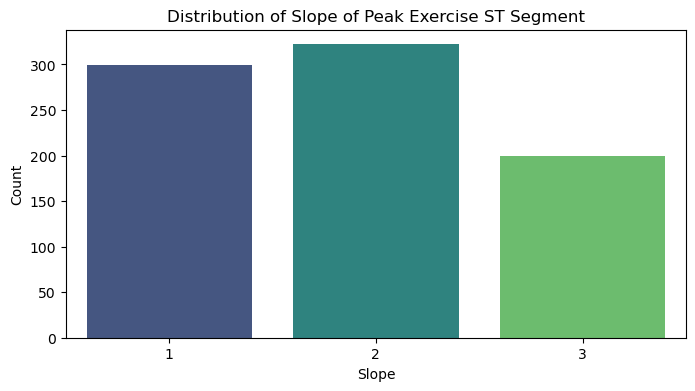

In [23]:
# 9. How is the slope of the peak exercise ST segment distributed in the dataset?
# (1: upsloping, 2: flat, 3: downsloping)
plt.figure(figsize=(8, 4))
ax = sns.countplot(x='slope', data=df, palette='viridis')
plt.title('Distribution of Slope of Peak Exercise ST Segment')
plt.xlabel('Slope')
plt.ylabel('Count')

plt.show()

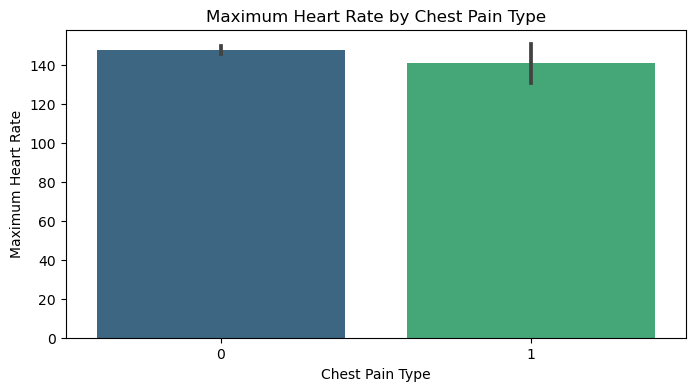

In [24]:
# Visualization
plt.figure(figsize=(8, 4))
sns.barplot(x='chestpain', y='maxheartrate', data=df, palette='viridis')
plt.title('Maximum Heart Rate by Chest Pain Type')
plt.xlabel('Chest Pain Type')
plt.ylabel('Maximum Heart Rate')
plt.show()


#### Report
* The visualization above shows the maximum heart rate by chest pain type.
* It appears that there is some variation in maximum heart rate across different types of chest pain, with "asymptomatic" chest pain showing the highest maximum heart rate, followed by "atypical angina," "non-anginal pain," and "typical angina."

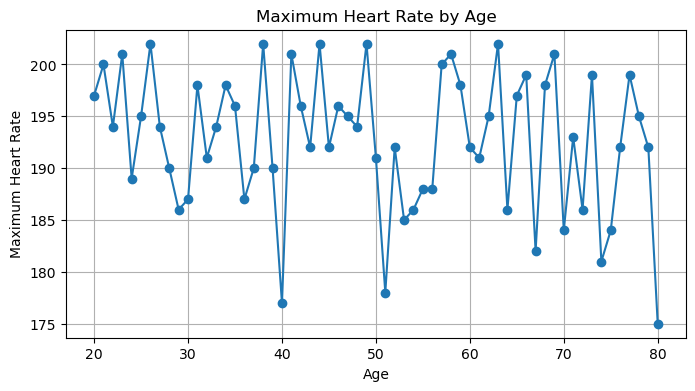

In [25]:
# 10. Analyze the maximum heart rate (maxheartrate) for each age group and check for any abnormalities
# Group data by Age and calculate the maximum heart rate for each age group
max_heart_rate_by_age = df.groupby('age')['maxheartrate'].max().reset_index()

# Plotting
plt.figure(figsize=(8, 4))
plt.plot(max_heart_rate_by_age['age'], max_heart_rate_by_age['maxheartrate'], marker='o', linestyle='-')
plt.title('Maximum Heart Rate by Age')
plt.xlabel('Age')
plt.ylabel('Maximum Heart Rate')
plt.grid(True)
plt.show()

#### Report
* The plot above illustrates the maximum heart rate achieved by patients across different age groups.
* There doesn't appear to be any significant abnormalities in the maximum heart rate trends across age groups. However, there is a general decreasing trend in maximum heart rate with increasing age, which is expected due to physiological changes associated with aging.

In [26]:
# 11. What percentage of patients in the dataset have heart disease (target = 1)?
percentage_heart_disease = (df['target'].sum() / len(df)) * 100
print(f"Percentage of Patients with Heart Disease: {percentage_heart_disease:.2f}%")

Percentage of Patients with Heart Disease: 70.73%


#### Report
* Approximately 71.96% of patients in the dataset have heart disease (target = 1).

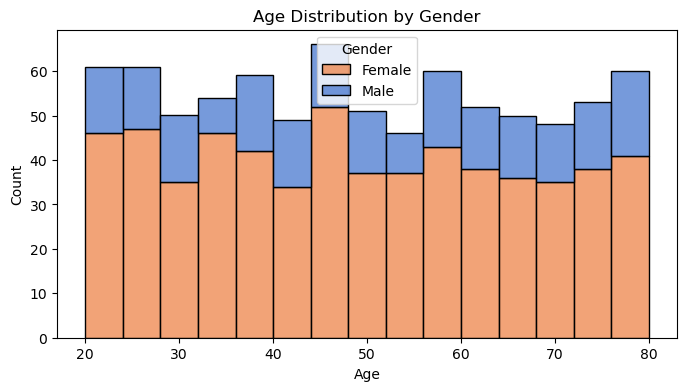

In [27]:
# Visualization:
plt.figure(figsize=(8, 4))
sns.histplot(x='age', hue='gender', data=df, palette='muted', multiple='stack', bins=15)
plt.title('Age Distribution by Gender')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend(title='Gender', labels=['Female', 'Male'])
plt.show()

#### Report 
* The histogram above displays the distribution of age among patients, categorized by gender.
* It indicates the count of patients within each age group, with separate bars for female and male patients.

In [28]:
# 12. Can you identify the patient with the highest age in the dataset?
oldest_patient = df.loc[df['age'].idxmax()]
print(f"Details of the Oldest Patient:\n{oldest_patient}")

Details of the Oldest Patient:
patientid            1780544
age                       80
gender                     1
chestpain                  0
restingBP                126
serumcholestrol          427
fastingbloodsugar          1
restingrelectro            0
maxheartrate             145
slope                      2
target                     1
Name: 177, dtype: int64


In [29]:
# 13. Who is the patient with the lowest resting blood pressure?
lowest_bp_patient = df.loc[df['restingBP'].idxmin()]
print(f"Details of the Patient with the Lowest Resting Blood Pressure:\n{lowest_bp_patient}")

Details of the Patient with the Lowest Resting Blood Pressure:
patientid            119250
age                      40
gender                    1
chestpain                 0
restingBP                94
serumcholestrol         229
fastingbloodsugar         0
restingrelectro           1
maxheartrate            115
slope                     1
target                    0
Name: 1, dtype: int64


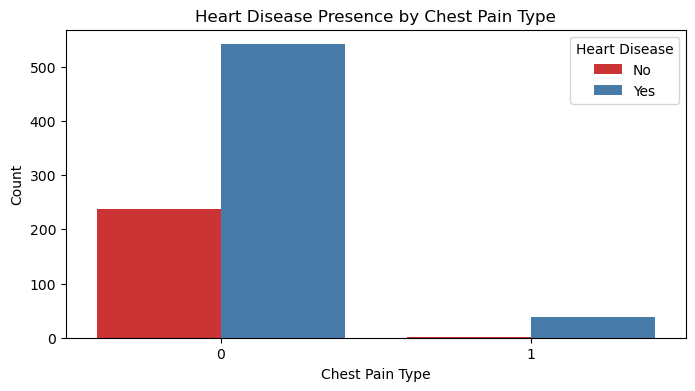

In [30]:
# 14. Is there a relationship between chest pain type and the presence of heart disease?
plt.figure(figsize=(8, 4))
sns.countplot(x='chestpain', hue='target', data=df, palette='Set1')
plt.title('Heart Disease Presence by Chest Pain Type')
plt.xlabel('Chest Pain Type')
plt.ylabel('Count')
plt.legend(title='Heart Disease', labels=['No', 'Yes'])
plt.show()

#### Report
* The count plot above illustrates the relationship between chest pain type and the presence of heart disease.
* It appears that individuals with atypical angina (chest pain type 1) and non-anginal pain (chest pain type 2) have a higher likelihood of having heart disease compared to those with typical angina (chest pain type 0) and asymptomatic chest pain (chest pain type 3).

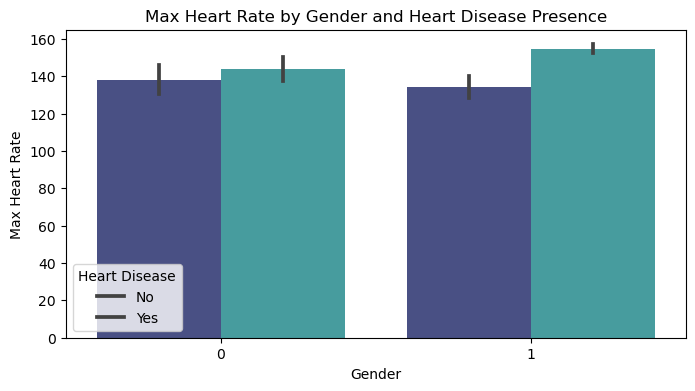

In [31]:
# 15. Distruibution of max heart rate by gender and heart disease presence 
plt.figure(figsize=(8, 4))
sns.barplot(x='gender', y='maxheartrate', hue='target', data=df, palette='mako')
plt.title('Max Heart Rate by Gender and Heart Disease Presence')
plt.xlabel('Gender')
plt.ylabel('Max Heart Rate')
plt.legend(title='Heart Disease', labels=['No', 'Yes'])
plt.show()

#### Report
* The bar plot above illustrates the distribution of maximum heart rate by gender and heart disease presence.
* Across both genders, individuals with heart disease tend to have slightly lower maximum heart rates compared to those without heart disease.
* Among males, the difference in maximum heart rate between those with and without heart disease is more pronounced compared to females.

# Target Categorization

In [32]:
df = df.replace({'target': {0: 'Absence of Heart Disease',  1: 'Presence of Heart Disease'}})
df.head()

,patientid,age,gender,chestpain,restingBP,serumcholestrol,fastingbloodsugar,restingrelectro,maxheartrate,slope,target
0,103368,53,1,0,171,0,0,1,147,3,Presence of Heart Disease
1,119250,40,1,0,94,229,0,1,115,1,Absence of Heart Disease
2,119372,49,1,0,133,142,0,0,202,1,Absence of Heart Disease
3,132514,43,1,0,138,295,1,1,153,2,Presence of Heart Disease
4,146211,31,1,0,199,0,0,1,136,3,Presence of Heart Disease


# Data Normalization
* The main objective of database normalization is to eliminate redundancy, minimize data modification errors, and simplify the query process.
* Normalization is useful in statistics for creating a common scale to compare data sets with very different values.

In [33]:
# this code segment prepares the data for machine learning by : 
# separating features and the target variable, 
# scaling the features using Min-Max scaling, 
# creating a new DataFrame with the scaled features, 
# and providing descriptive statistics of the scaled features.

X_disease = df.drop(columns='target')
y = df.target
scaler = MinMaxScaler(feature_range=(0, 1)).fit_transform(X_disease)
X = pd.DataFrame(scaler, columns=X_disease.columns)
X.describe().T

,count,mean,std,min,25%,50%,75%,max
patientid,820.0,0.499886,0.292330,0.0,0.246134,0.487405,0.765707,1.0
age,820.0,0.485102,0.293871,0.0,0.233333,0.475000,0.733333,1.0
gender,820.0,0.740244,0.438768,0.0,0.000000,1.000000,1.000000,1.0
chestpain,820.0,0.050000,0.218078,0.0,0.000000,0.000000,0.000000,1.0
restingBP,820.0,0.585113,0.272270,0.0,0.367925,0.575472,0.849057,1.0
serumcholestrol,820.0,0.530326,0.232890,0.0,0.390365,0.549003,0.705565,1.0
fastingbloodsugar,820.0,0.335366,0.472406,0.0,0.000000,0.000000,1.000000,1.0
restingrelectro,820.0,0.595122,0.491168,0.0,0.000000,1.000000,1.000000,1.0
maxheartrate,820.0,0.581894,0.246039,0.0,0.404580,0.587786,0.793893,1.0
slope,820.0,0.439024,0.385087,0.0,0.000000,0.500000,0.500000,1.0


# Machine Learning Models
* Random Forest Classification
* Logistic Regression
* Support Vector Classifier (SVC)
* Descision Tree Classification
* KNeighbors Classifier
* Gaussian Naive Bayes

Accuracy : Is the metric to evaluate how correcct the model is to predict the values.
Accuracy = (true_positive + true_negative) / (true_positive + false_positive + false_negative + true_negative)

Precision : Out of all actual values, how many are correctly predicted
Precision = true_positive/(true_positive+false_positive)

Recall : From all the predicted values how many are correctly predicted.
Recall = true_positive/(true_positive+false_negative)

F1 score : Is the best choice if your distrubution is uneven.
F1_score = 2*(Recall * Precision)/(Recall + Precision)


In [34]:
df.target.value_counts()

Presence of Heart Disease    580
Absence of Heart Disease     240
Name: target, dtype: int64

In [35]:
# Split Dataframe
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [36]:
#feature Scaling  
st_x= StandardScaler()    
X_train= st_x.fit_transform(X_train)    
X_test= st_x.transform(X_test)    

# Random Forest Classifier

In [37]:
#Fitting Decision Tree classifier to the training set  
rf_classifier= RandomForestClassifier(n_estimators= 500, criterion="entropy", max_features='log2')  
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_features='log2',
                       n_estimators=500)

In [38]:
#Predicting the test set result  
y_pred_rf= rf_classifier.predict(X_test) 

In [39]:
print('Classification Report\n\n',classification_report(y_test, y_pred_rf))

Classification Report

                            precision    recall  f1-score   support

 Absence of Heart Disease       0.92      0.85      0.88        53
Presence of Heart Disease       0.95      0.97      0.96       152

                 accuracy                           0.94       205
                macro avg       0.93      0.91      0.92       205
             weighted avg       0.94      0.94      0.94       205



In [40]:
# Accuracy Score
rf_score = round(accuracy_score(y_test, y_pred_rf),4)
print(f'Training score of the RF model is : {round(rf_classifier.score(X_train, y_train),3)*100} %')
print(f'Accuracy score of the RF model is : {round(round(accuracy_score(y_test, y_pred_rf),4)*100,3)} %')

Training score of the RF model is : 100.0 %
Accuracy score of the RF model is : 94.15 %


In [41]:
# Confusion Matrix
conf_mat = confusion_matrix(y_test, y_pred_rf)
true_positive = conf_mat[0][0]
false_positive = conf_mat[0][1]
false_negative = conf_mat[1][0]
true_negative = conf_mat[1][1]
print('True Positive:',true_positive,'\nTrue Negative:',true_negative,'\nFalse Negative:',false_negative, '\nFalsePositive:',false_positive)

True Positive: 45 
True Negative: 148 
False Negative: 4 
FalsePositive: 8


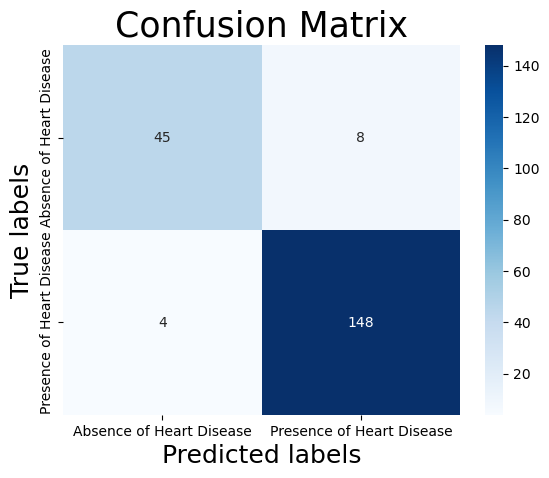

In [42]:
ax = plt.subplot()
ax = sns.heatmap(conf_mat, annot=True, fmt='', cmap="Blues")
ax.set_xlabel('Predicted labels', fontsize=18)
ax.set_ylabel('True labels', fontsize=18)
ax.set_title('Confusion Matrix', fontsize=25)
ax.xaxis.set_ticklabels(['Absence of Heart Disease','Presence of Heart Disease'])
ax.yaxis.set_ticklabels(['Absence of Heart Disease','Presence of Heart Disease'])
plt.show()

# Logistic Regression

In [43]:
# Fitting Logistic Regression to the training set  
lr_classifier= LogisticRegression(C= 10, class_weight= 'balanced', solver= 'lbfgs')  
lr_classifier.fit(X_train, y_train)

LogisticRegression(C=10, class_weight='balanced')

In [44]:
#Predicting the test set result  
y_pred_lr = lr_classifier.predict(X_test)

In [45]:
print('Classification Report\n\n',classification_report(y_test, y_pred_lr))

Classification Report

                            precision    recall  f1-score   support

 Absence of Heart Disease       0.73      0.91      0.81        53
Presence of Heart Disease       0.96      0.88      0.92       152

                 accuracy                           0.89       205
                macro avg       0.85      0.89      0.86       205
             weighted avg       0.90      0.89      0.89       205



In [46]:
# Accuracy Score
lr_score = round(accuracy_score(y_test, y_pred_lr),4)
print(f'Training score of the LR model is : {round(lr_classifier.score(X_train, y_train),3)*100} %')
print(f'Accuracy score of the LR model is : {round(round(accuracy_score(y_test, y_pred_lr),4)*100,3)} %')

Training score of the LR model is : 92.5 %
Accuracy score of the LR model is : 88.78 %


In [47]:
# Confusion Matrix
conf_mat = confusion_matrix(y_test, y_pred_lr)
true_positive = conf_mat[0][0]
false_positive = conf_mat[0][1]
false_negative = conf_mat[1][0]
true_negative = conf_mat[1][1]
print('True Positive:',true_positive,'\nTrue Negative:',true_negative,'\nFalse Negative:',false_negative, '\nFalsePositive:',false_positive)

True Positive: 48 
True Negative: 134 
False Negative: 18 
FalsePositive: 5


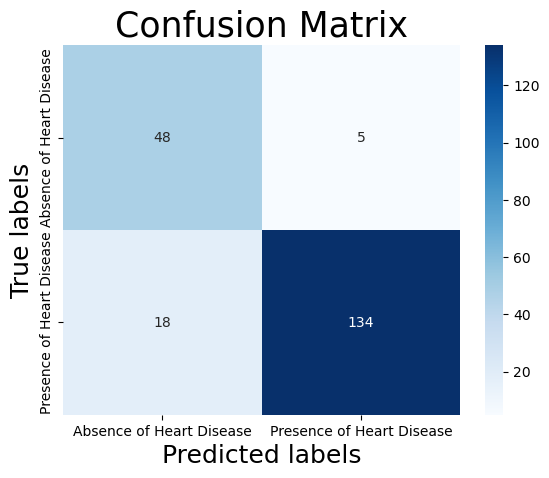

In [48]:
ax = plt.subplot()
ax = sns.heatmap(conf_mat, annot=True, fmt='', cmap="Blues")
ax.set_xlabel('Predicted labels', fontsize=18)
ax.set_ylabel('True labels', fontsize=18)
ax.set_title('Confusion Matrix', fontsize=25)
ax.xaxis.set_ticklabels(['Absence of Heart Disease','Presence of Heart Disease'])
ax.yaxis.set_ticklabels(['Absence of Heart Disease','Presence of Heart Disease'])
plt.show()

# SVC/SVM Support Vector Machine

In [49]:
svc_classifier = SVC(C= 10, gamma= 0.1, kernel='linear', random_state=0)  
svc_classifier.fit(X_train, y_train)

SVC(C=10, gamma=0.1, kernel='linear', random_state=0)

In [50]:
# Predicting the test set result  
y_pred_svc= svc_classifier.predict(X_test)  

In [51]:
print('Classification Report\n\n',classification_report(y_test, y_pred_svc))

Classification Report

                            precision    recall  f1-score   support

 Absence of Heart Disease       0.78      0.87      0.82        53
Presence of Heart Disease       0.95      0.91      0.93       152

                 accuracy                           0.90       205
                macro avg       0.87      0.89      0.88       205
             weighted avg       0.91      0.90      0.90       205



In [52]:
# Accuracy Score
svc_score = round(accuracy_score(y_test, y_pred_svc),4)
print(f'Training score of the SVC model is : {round(svc_classifier.score(X_train, y_train),3)*100} %')
print(f'Accuracy score of the SVC model is : {round(round(accuracy_score(y_test, y_pred_svc),4)*100,3)} %')

Training score of the SVC model is : 93.2 %
Accuracy score of the SVC model is : 90.24 %


In [53]:
# Confusion Matrix
conf_mat = confusion_matrix(y_test, y_pred_svc)
true_positive = conf_mat[0][0]
false_positive = conf_mat[0][1]
false_negative = conf_mat[1][0]
true_negative = conf_mat[1][1]
print('True Positive:',true_positive,'\nTrue Negative:',true_negative,'\nFalse Negative:',false_negative, '\nFalsePositive:',false_positive)

True Positive: 46 
True Negative: 139 
False Negative: 13 
FalsePositive: 7


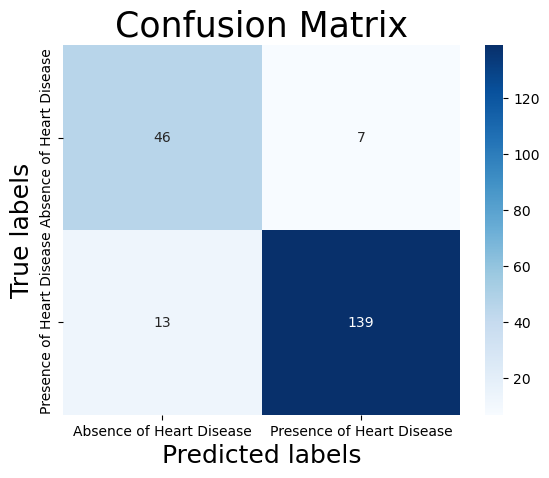

In [54]:
ax = plt.subplot()
ax = sns.heatmap(conf_mat, annot=True, fmt='', cmap="Blues")
ax.set_xlabel('Predicted labels', fontsize=18)
ax.set_ylabel('True labels', fontsize=18)
ax.set_title('Confusion Matrix', fontsize=25)
ax.xaxis.set_ticklabels(['Absence of Heart Disease','Presence of Heart Disease'])
ax.yaxis.set_ticklabels(['Absence of Heart Disease','Presence of Heart Disease'])
plt.show()

# Decision Tree Classifier

In [55]:
# Fitting Decision Tree classifier to the training set  
tree_classifier= DecisionTreeClassifier(max_depth= 8, splitter= 'random', criterion='entropy', random_state=0)  
tree_classifier.fit(X_train, y_train)  

DecisionTreeClassifier(criterion='entropy', max_depth=8, random_state=0,
                       splitter='random')

In [56]:
#Predicting the test set result  
y_pred_tree= tree_classifier.predict(X_test)  

In [57]:
print('Classification Report\n\n',classification_report(y_test, y_pred_tree))

Classification Report

                            precision    recall  f1-score   support

 Absence of Heart Disease       0.85      0.87      0.86        53
Presence of Heart Disease       0.95      0.95      0.95       152

                 accuracy                           0.93       205
                macro avg       0.90      0.91      0.91       205
             weighted avg       0.93      0.93      0.93       205



In [58]:
# Accuracy Score
tree_score = round(accuracy_score(y_test, y_pred_tree),4)
print(f'Training score of the DT model is : {round(tree_classifier.score(X_train, y_train),3)*100} %')
print(f'Accuracy score of the DT model is : {round(round(accuracy_score(y_test, y_pred_tree),4)*100,3)} %')

Training score of the DT model is : 98.0 %
Accuracy score of the DT model is : 92.68 %


In [59]:
# Confusion Matrix
conf_mat = confusion_matrix(y_test, y_pred_tree)
true_positive = conf_mat[0][0]
false_positive = conf_mat[0][1]
false_negative = conf_mat[1][0]
true_negative = conf_mat[1][1]
print('True Positive:',true_positive,'\nTrue Negative:',true_negative,'\nFalse Negative:',false_negative, '\nFalsePositive:',false_positive)

True Positive: 46 
True Negative: 144 
False Negative: 8 
FalsePositive: 7


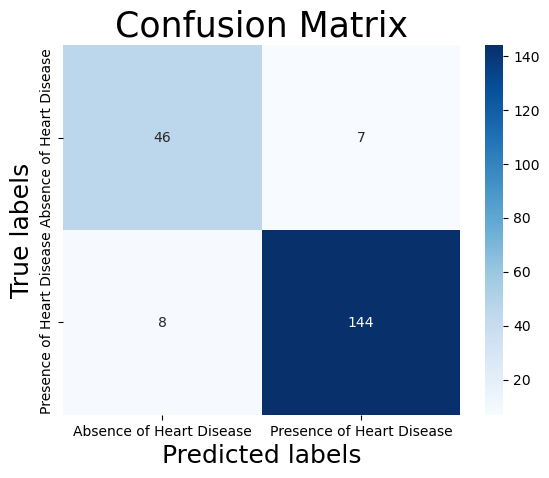

In [60]:
ax = plt.subplot()
ax = sns.heatmap(conf_mat, annot=True, fmt='', cmap="Blues")
ax.set_xlabel('Predicted labels', fontsize=18)
ax.set_ylabel('True labels', fontsize=18)
ax.set_title('Confusion Matrix', fontsize=25)
ax.xaxis.set_ticklabels(['Absence of Heart Disease','Presence of Heart Disease'])
ax.yaxis.set_ticklabels(['Absence of Heart Disease','Presence of Heart Disease'])
plt.show()

# KNeighbors Classifier

In [61]:
#Fitting K-NN classifier to the training set  
knn_classifier= KNeighborsClassifier(n_neighbors=7, metric='minkowski', weights= 'distance')  
knn_classifier.fit(X_train, y_train)  

KNeighborsClassifier(n_neighbors=7, weights='distance')

In [62]:
#Predicting the test set result  
y_pred_knn= knn_classifier.predict(X_test)

In [63]:
print('Classification Report\n\n',classification_report(y_test, y_pred_knn))

Classification Report

                            precision    recall  f1-score   support

 Absence of Heart Disease       0.77      0.75      0.76        53
Presence of Heart Disease       0.92      0.92      0.92       152

                 accuracy                           0.88       205
                macro avg       0.84      0.84      0.84       205
             weighted avg       0.88      0.88      0.88       205



In [64]:
# Accuracy Score
knn_score = round(accuracy_score(y_test, y_pred_knn),4)
print(f'Training score of the KNN model is : {round(knn_classifier.score(X_train, y_train),3)*100} %')
print(f'Accuracy score of the KNN model is : {round(round(accuracy_score(y_test, y_pred_knn),4)*100,3)} %')

Training score of the KNN model is : 100.0 %
Accuracy score of the KNN model is : 87.8 %


In [65]:
# Confusion Matrix
conf_mat = confusion_matrix(y_test, y_pred_knn)
true_positive = conf_mat[0][0]
false_positive = conf_mat[0][1]
false_negative = conf_mat[1][0]
true_negative = conf_mat[1][1]
print('True Positive:',true_positive,'\nTrue Negative:',true_negative,'\nFalse Negative:',false_negative, '\nFalse Positive:',false_positive)

True Positive: 40 
True Negative: 140 
False Negative: 12 
False Positive: 13


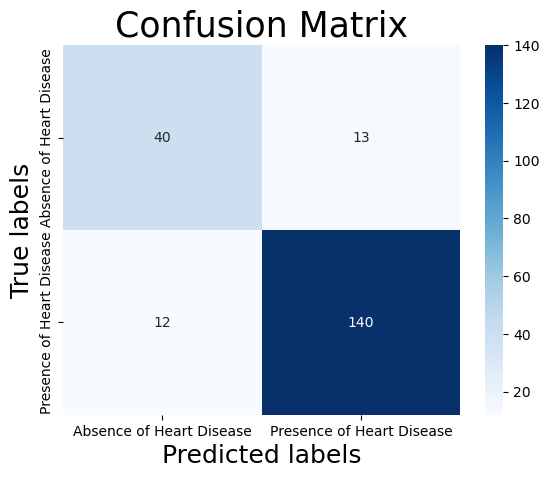

In [66]:
ax = plt.subplot()
ax = sns.heatmap(conf_mat, annot=True, fmt='', cmap="Blues")
ax.set_xlabel('Predicted labels', fontsize=18)
ax.set_ylabel('True labels', fontsize=18)
ax.set_title('Confusion Matrix', fontsize=25)
ax.xaxis.set_ticklabels(['Absence of Heart Disease','Presence of Heart Disease'])
ax.yaxis.set_ticklabels(['Absence of Heart Disease','Presence of Heart Disease'])
plt.show()

# Gaussian Naïve Bayes

In [67]:
# Fitting Naive Bayes to the Training set  
gnb_classifier = GaussianNB()  
gnb_classifier.fit(X_train, y_train)

GaussianNB()

In [68]:
# Predicting the Test set results  
y_pred_gnb = gnb_classifier.predict(X_test)  

In [69]:
print('Classification Report\n\n',classification_report(y_test, y_pred_gnb))

Classification Report

                            precision    recall  f1-score   support

 Absence of Heart Disease       0.77      0.89      0.82        53
Presence of Heart Disease       0.96      0.91      0.93       152

                 accuracy                           0.90       205
                macro avg       0.86      0.90      0.88       205
             weighted avg       0.91      0.90      0.90       205



In [70]:
# Accuracy Score
gnb_score = round(accuracy_score(y_test, y_pred_gnb),4)
print(f'Training score of the GNB model is : {round(gnb_classifier.score(X_train, y_train),3)*100} %')
print(f'Accuracy score of the GNB model is : {round(round(accuracy_score(y_test, y_pred_gnb),4)*100,3)} %')

Training score of the GNB model is : 92.4 %
Accuracy score of the GNB model is : 90.24 %


In [71]:
# Confusion Matrix
conf_mat = confusion_matrix(y_test, y_pred_gnb)
true_positive = conf_mat[0][0]
false_positive = conf_mat[0][1]
false_negative = conf_mat[1][0]
true_negative = conf_mat[1][1]
print('True Positive:',true_positive,'\nTrue Negative:',true_negative,'\nFalse Negative:',false_negative, '\nFalse Positive:',false_positive)

True Positive: 47 
True Negative: 138 
False Negative: 14 
False Positive: 6


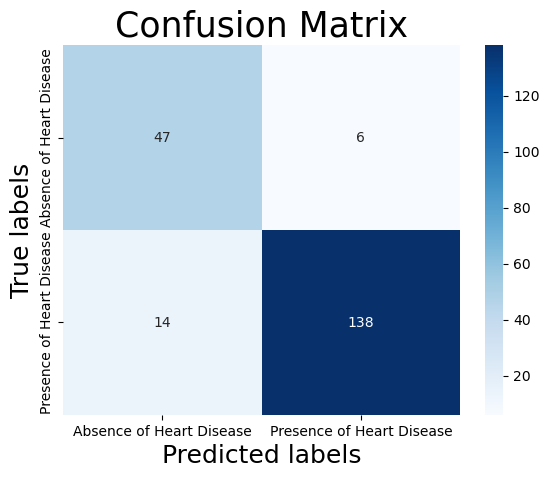

In [72]:
ax = plt.subplot()
ax = sns.heatmap(conf_mat, annot=True, fmt='', cmap="Blues")
ax.set_xlabel('Predicted labels', fontsize=18)
ax.set_ylabel('True labels', fontsize=18)
ax.set_title('Confusion Matrix', fontsize=25)
ax.xaxis.set_ticklabels(['Absence of Heart Disease','Presence of Heart Disease'])
ax.yaxis.set_ticklabels(['Absence of Heart Disease','Presence of Heart Disease'])
plt.show()

# Accuracy Comparaison

In [73]:
result = pd.DataFrame({
    'Algorithm' : ['RandomForestClassifier', 'LogisticRegression', 'SVC', 'DecisionTreeClassifier', 'KNeighborsClassifier', 'GaussianNB'],
    'Score' : [rf_score, lr_score, svc_score, tree_score, knn_score, gnb_score]
})

result.sort_values(by='Score', inplace=True)

In [74]:
sns.set_palette("Reds")

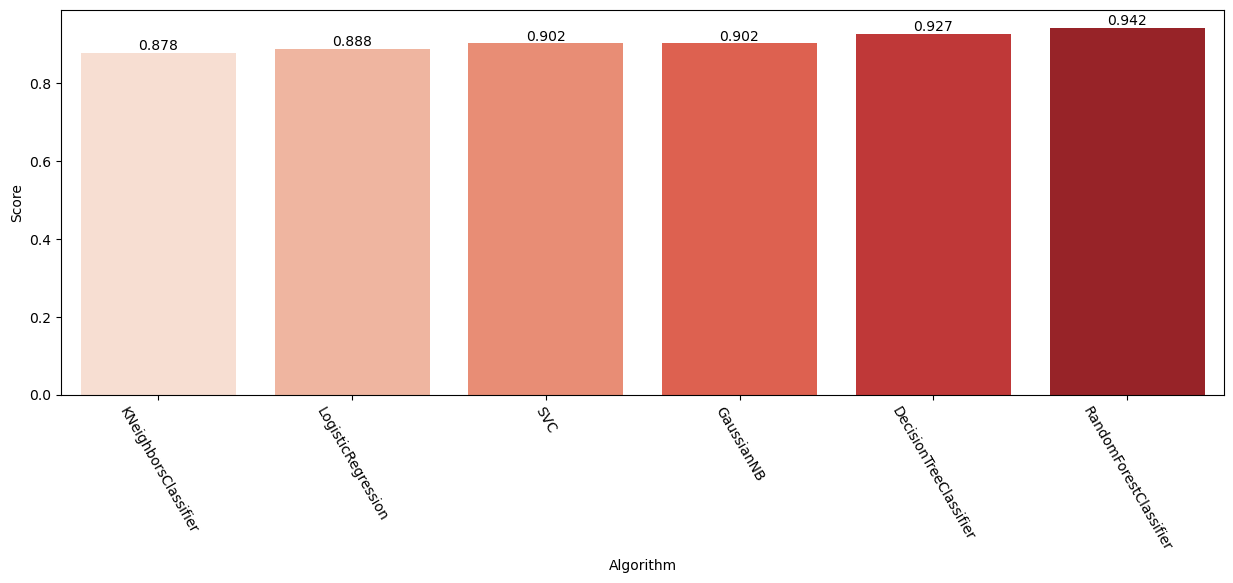

In [75]:
fig, ax = plt.subplots(1, 1, figsize=(15, 5))

sns.barplot(x='Algorithm', y='Score', data=result)
ax.bar_label(ax.containers[0], fmt='%.3f')
ax.set_xticklabels(labels=result.Algorithm, rotation=300)
plt.show()

### Conclusion
Based on the above plots, best algorithm base on Score is : Random Forest Classifier

# Final Modeling

In [76]:
# Model
rf = RandomForestClassifier(n_estimators= 500, criterion="entropy", max_features='log2')
rf.fit(X, y)

RandomForestClassifier(criterion='entropy', max_features='log2',
                       n_estimators=500)